# 🎬 Apify Instagram Reel Scraper 튜토리얼

이 노트북에서는 Apify의 Instagram Reel Scraper를 Python으로 활용하는 방법을 단계별로 학습합니다.

## 📋 학습 목표
1. Apify Client 설치 및 설정
2. Instagram Reel 데이터 수집 기본 사용법
3. 다양한 입력 옵션 활용
4. 수집된 데이터 분석 및 활용
5. 비동기(Async) 클라이언트 사용법
6. 에러 처리 및 베스트 프랙티스

---

## 1️⃣ 환경 설정

### 1.1 필요한 패키지 설치

In [ ]:
# Apify Client 및 데이터 분석용 패키지 설치
!pip install apify-client pandas matplotlib

### 1.2 라이브러리 임포트

In [51]:
from apify_client import ApifyClient
import pandas as pd
import json
from datetime import datetime
import matplotlib.pyplot as plt
from dotenv import load_dotenv
load_dotenv()

print("✅ 라이브러리 임포트 완료!")

✅ 라이브러리 임포트 완료!


### 1.3 Apify API 토큰 설정

API 토큰은 [Apify Console > Settings > Integrations](https://console.apify.com/settings/integrations)에서 확인할 수 있습니다.

> ⚠️ **보안 주의**: API 토큰은 절대 공개 저장소에 커밋하지 마세요!

In [2]:
# 방법 1: 직접 입력 (테스트용)
# APIFY_TOKEN = "<YOUR_API_TOKEN>"  # 여기에 실제 토큰 입력

# 방법 2: 환경 변수 사용 (권장)
import os
APIFY_API_TOKEN = os.environ.get("APIFY_TOKEN")

# 클라이언트 초기화
client = ApifyClient(APIFY_API_TOKEN)
print("✅ Apify Client 초기화 완료!")

✅ Apify Client 초기화 완료!


---

## 2️⃣ 기본 사용법: Instagram Reel 스크래핑

### 2.1 Actor 정보

Instagram Reel Scraper의 Actor ID는 `xMc5Ga1oCONPmWJIa`입니다.

### 2.2 기본 스크래핑 예제

In [ ]:
# Actor 입력 설정
run_input = {
    "username": ["ddobini619"],     # 스크래핑할 Instagram 사용자명
    "resultsLimit": 5,              # 가져올 릴스 개수
    # 추가 요금  - 거의 2배 증가
    "includeSharesCount": False,    # 공유 수 포함 - 이거는 안되는데?
    "includeTranscript": True,      # 자막 포함
}

print("📋 입력 설정:")
print(json.dumps(run_input, indent=2))

📋 입력 설정:
{
  "username": [
    "ddobini619"
  ],
  "resultsLimit": 5,
  "includeSharesCount": true,
  "includeTranscript": true
}


In [39]:
# Actor 실행 (완료될 때까지 대기)
print("🚀 Instagram Reel Scraper 실행 중...")
print("⏳ 완료까지 잠시 기다려주세요...")

run = client.actor("xMc5Ga1oCONPmWJIa").call(run_input=run_input)

print(f"\n✅ 실행 완료!")
print(f"📊 Run ID: {run['id']}")
print(f"📁 Dataset ID: {run['defaultDatasetId']}")

🚀 Instagram Reel Scraper 실행 중...
⏳ 완료까지 잠시 기다려주세요...


[apify.instagram-reel-scraper runId:vlhXesUub7b8CedvB] -> Status: RUNNING, Message: 
[apify.instagram-reel-scraper runId:vlhXesUub7b8CedvB] -> 2025-12-23T17:06:30.769Z ACTOR: Pulling container image of build gWxOmlKJ3WrmuIQE3 from registry.
[apify.instagram-reel-scraper runId:vlhXesUub7b8CedvB] -> 2025-12-23T17:06:30.771Z ACTOR: Creating container.
[apify.instagram-reel-scraper runId:vlhXesUub7b8CedvB] -> 2025-12-23T17:06:30.909Z ACTOR: Starting container.
[apify.instagram-reel-scraper runId:vlhXesUub7b8CedvB] -> 2025-12-23T17:06:30.911Z ACTOR: Running under "LIMITED_PERMISSIONS" permission level.
[apify.instagram-reel-scraper runId:vlhXesUub7b8CedvB] -> 2025-12-23T17:06:31.775Z INFO  System info {"apifyVersion":"3.5.1","apifyClientVersion":"2.19.0","crawleeVersion":"3.15.3","osType":"Linux","nodeVersion":"v22.21.1"}
[apify.instagram-reel-scraper runId:vlhXesUub7b8CedvB] -> 2025-12-23T17:06:31.886Z WARN  includeSharesCount is not supported for free users
[apify.instagram-reel-scraper r


✅ 실행 완료!
📊 Run ID: vlhXesUub7b8CedvB
📁 Dataset ID: ril6xxw86X50Vcqpx


In [40]:
# 결과 데이터 가져오기
dataset_items = list(client.dataset(run["defaultDatasetId"]).iterate_items())

print(f"📥 총 {len(dataset_items)}개의 릴스 데이터를 가져왔습니다!")

📥 총 5개의 릴스 데이터를 가져왔습니다!


In [41]:
run_id = run["id"]
run_id

'vlhXesUub7b8CedvB'

In [42]:
# 비용 조회
usage = client.run(run_id).get()
# usage
print("$",usage.get("usageTotalUsd"))
# print(usage.get("usageUsd"))
# print(usage.get("usage"))

$ 0.403


In [ ]:
# 실제로 필요한 요소들

dataset_items[1].get("transcript")
# shortCode, caption,hashtags ,mentions, url, videoUrl
# commentsCount, likesCount, videoViewCount, videoPlayCount
# timestamp, isPinned

# Options
# transcript


'아니 어디 가는데? 여행. 여행? 진짜로? 가평으로 1박 2일. 가평? 1박 2일? 나 지금 화장할 것만 들고 오고 스킨케어고 뭐고 아무것도 없는데? 그럼 올리브영 한 번만 가주면 안 돼? 진짜 제발 올리브영 한 번만. 누가 여행을 이렇게 데려가. 다 살 순 없고 이거 하나면 충분해. 아니 이렇게 여행을 가면 맨얼굴에 화장했다가 화장도 안 먹고 잘 때 스킨케어는 어떡하라고 이러는 거야? 아 살 것 같다. 너무 촉촉해. 오고 진짜 좋아 보인다. 이거 내가 맨날 쓰는 크림 알지? 이거 미스트 버전인데 둘이 진정에 속광까지 시너지가 너무 좋아. 이렇게 크림까지 바르면 이렇게 완전히 속광 미쳐버린다 이거야. 아니 피부 진짜 좋아 보여. 알 사람들은 진짜 다 아는 완전 1등 크림인데 나 이거 비즈니스 탔을 때도 자다가 너무 건조해서 이 미스트에다가 크림 바로 발랐었잖아. 난 이거 겨울에 필수야. 진짜로. 아 나 이거 아직 쓸 거 남았는데 미리 말 좀 하지. 나 심지어 쟁인 것도 아직 있는데. 그치만 이거 12월 올리브영픽 선정돼서 대박 할인하는 거야. 난 진짜 완전 개이득 봤어. 이거 보이면 무조건 사세요. 어머나 세상에 진짜 화장이 너무 잘 되셨다. 어디 좋은 데 갔었나 봐요. 피부에 광이. 여기에다가 이제 미스트까지 뿌리면 아니 진짜 하이빔이 따로 없다 이 말이야. 아가씨들 올리브영에서 이거 보이면 진짜 무조건 사셔요. 오늘 진짜 나한테 욕먹을 뻔했다가 화장 잘 먹어서 살았다 자기. 응?'

In [47]:
# 첫 번째 결과 확인
if dataset_items:
    first_reel = dataset_items[-1]
    print("🎬 첫 번째 릴스 데이터 구조:")
    print(json.dumps(first_reel, indent=2, ensure_ascii=False, default=str))

🎬 첫 번째 릴스 데이터 구조:
{
  "id": "3365401464065023086",
  "type": "Video",
  "shortCode": "C60Ts0ILNxu",
  "caption": "냅다 청바지 잘라봤는데 음..~ 당신들이 보기에 몇 점?\n#패션크루 #버뮤다팬츠 #reels #패션",
  "hashtags": [
    "패션크루",
    "버뮤다팬츠",
    "reels",
    "패션"
  ],
  "mentions": [],
  "url": "https://www.instagram.com/p/C60Ts0ILNxu/",
  "commentsCount": 188,
  "dimensionsHeight": 1333,
  "dimensionsWidth": 750,
  "images": [
    "https://scontent-ord5-3.cdninstagram.com/v/t51.71878-15/504142980_1258236869235174_6292251595937950088_n.jpg?stp=dst-jpg_e15_tt6&_nc_cat=110&cb2=04374bf5-0f8d2c46&ig_cache_key=MzM2NTQwMTQ2NDA2NTAyMzA4Ng%3D%3D.3-ccb7-5-cb204374bf5-0f8d2c46&ccb=7-5&_nc_sid=58cdad&efg=eyJ2ZW5jb2RlX3RhZyI6InhwaWRzLjcyMHgxMjgwLnNkci5DMyJ9&_nc_ohc=eO_XSQQEZYYQ7kNvwHgH2bS&_nc_oc=Adm1pVrYEcNqPkubSgnWbaMI7XjRXO8jFsOh-3EdZGpwTf07M-RMlsIKu_XFvlZfJyE&_nc_ad=z-m&_nc_cid=0&_nc_zt=23&_nc_ht=scontent-ord5-3.cdninstagram.com&_nc_gid=v7FJX7aK8Lz5uDhkCbJVJg&oh=00_Afn3uhZDOpCOaItxuLUBNzOAukJLUeu-rj2VTi-h-TTkmg&oe=69508EA

---

## 3️⃣ 수집 가능한 데이터 필드

Instagram Reel Scraper가 수집하는 주요 데이터 필드를 살펴봅시다.

In [ ]:
# 데이터 필드 분석
if dataset_items:
    sample = dataset_items[0]
    
    print("📋 수집 가능한 주요 필드:")
    print("=" * 50)
    
    field_descriptions = {
        "id": "릴스 고유 ID",
        "shortCode": "릴스 단축 코드",
        "url": "릴스 URL",
        "caption": "캡션 (설명 텍스트)",
        "hashtags": "해시태그 목록",
        "mentions": "멘션된 사용자",
        "likesCount": "좋아요 수",
        "commentsCount": "댓글 수",
        "videoViewCount": "조회수",
        "videoPlayCount": "재생 수",
        "sharesCount": "공유 수",
        "videoDuration": "영상 길이 (초)",
        "timestamp": "게시 시간",
        "ownerUsername": "게시자 사용자명",
        "ownerFullName": "게시자 이름",
        "transcript": "영상 자막/스크립트",
        "videoUrl": "영상 다운로드 URL",
        "images": "썸네일 이미지 URL",
        "musicInfo": "음악 정보",
        "latestComments": "최근 댓글 (최대 10개)",
    }
    
    for field, desc in field_descriptions.items():
        value = sample.get(field, "N/A")
        if isinstance(value, list):
            value = f"[{len(value)} items]"
        elif isinstance(value, dict):
            value = "{...}"
        elif isinstance(value, str) and len(value) > 50:
            value = value[:50] + "..."
        print(f"  • {field}: {desc}")
        print(f"    └─ 예시: {value}")

--- 
## 4️⃣ 데이터 분석 및 시각화

수집된 데이터를 Pandas DataFrame으로 변환하여 분석해봅시다.

In [48]:
# DataFrame으로 변환
if dataset_items:
    df = pd.DataFrame(dataset_items)
    
    # 주요 컬럼만 선택
    columns_to_display = [
        'shortCode', 'ownerUsername', 'likesCount', 
        'commentsCount', 'videoViewCount', 'videoDuration', 'timestamp'
    ]
    
    available_columns = [col for col in columns_to_display if col in df.columns]
    df_display = df[available_columns].copy()
    
    print("📊 수집된 릴스 데이터 (주요 컬럼):")
    display(df_display)

📊 수집된 릴스 데이터 (주요 컬럼):


,shortCode,ownerUsername,likesCount,commentsCount,videoViewCount,videoDuration,timestamp
0,C86ZjvtpwtH,ddobini619,30162,123,1172732,58.033,2024-07-02T07:54:31.000Z
1,DSkDQJdku1N,ddobini619,2312,18,50629,115.600,2025-12-22T11:00:00.000Z
2,DSe_MOeEm42,ddobini619,733,27,12848,79.466,2025-12-20T11:52:04.000Z
3,DShguB1EjYo,ddobini619,845,14,17324,86.166,2025-12-21T11:21:24.000Z
4,C60Ts0ILNxu,ddobini619,30691,188,1653945,59.666,2024-05-11T06:02:38.000Z


In [49]:
# 기본 통계
if dataset_items and 'likesCount' in df.columns:
    print("📈 기본 통계:")
    print("=" * 40)
    print(f"총 릴스 개수: {len(df)}")
    print(f"평균 좋아요 수: {df['likesCount'].mean():,.0f}")
    print(f"최대 좋아요 수: {df['likesCount'].max():,.0f}")
    print(f"평균 댓글 수: {df['commentsCount'].mean():,.0f}")
    
    if 'videoDuration' in df.columns:
        print(f"평균 영상 길이: {df['videoDuration'].mean():.1f}초")

📈 기본 통계:
총 릴스 개수: 5
평균 좋아요 수: 12,949
최대 좋아요 수: 30,691
평균 댓글 수: 74
평균 영상 길이: 79.8초


/tmp/ipykernel_6835/3709907345.py:20: UserWarning: Glyph 51339 (\N{HANGUL SYLLABLE JOH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_6835/3709907345.py:20: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_6835/3709907345.py:20: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_6835/3709907345.py:20: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_6835/3709907345.py:20: UserWarning: Glyph 47540 (\N{HANGUL SYLLABLE RIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_6835/3709907345.py:20: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_6835/3709907345.py:20: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_lay

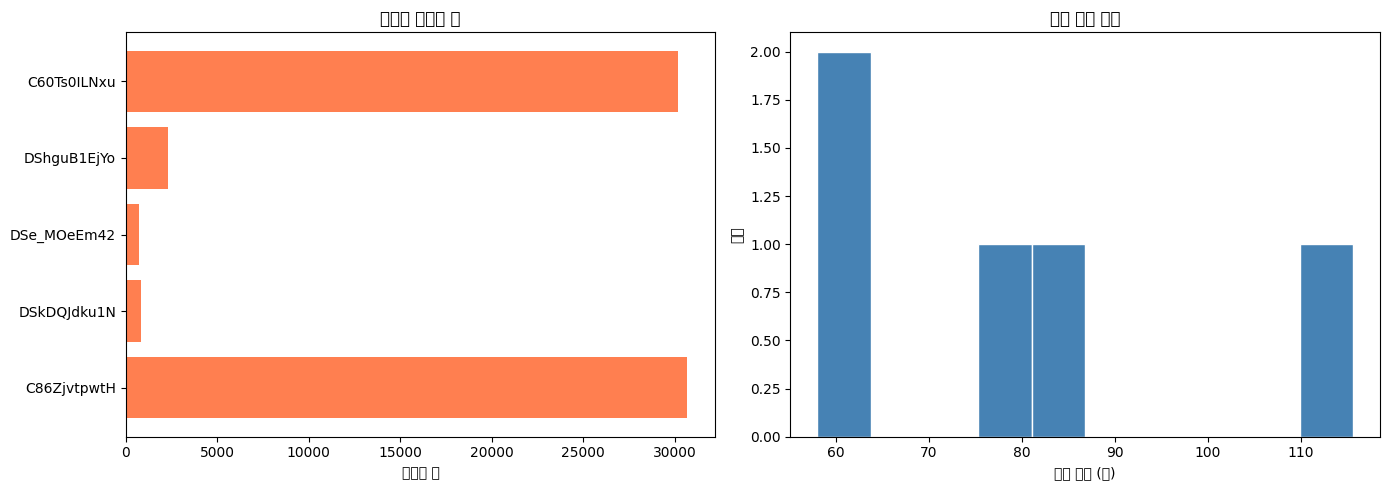

In [52]:
# 시각화: 좋아요 수 분포
if dataset_items and 'likesCount' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # 좋아요 수 막대 그래프
    axes[0].barh(range(len(df)), df['likesCount'].values, color='coral')
    axes[0].set_yticks(range(len(df)))
    axes[0].set_yticklabels(df['shortCode'].values[::-1] if 'shortCode' in df.columns else range(len(df)))
    axes[0].set_xlabel('좋아요 수')
    axes[0].set_title('릴스별 좋아요 수')
    axes[0].invert_yaxis()
    
    # 영상 길이 분포 (있는 경우)
    if 'videoDuration' in df.columns:
        axes[1].hist(df['videoDuration'], bins=10, color='steelblue', edgecolor='white')
        axes[1].set_xlabel('영상 길이 (초)')
        axes[1].set_ylabel('빈도')
        axes[1].set_title('영상 길이 분포')
    
    plt.tight_layout()
    plt.show()

### 4.1 해시태그 분석

In [53]:
# 해시태그 빈도 분석
if dataset_items and 'hashtags' in df.columns:
    all_hashtags = []
    for hashtags in df['hashtags']:
        if isinstance(hashtags, list):
            all_hashtags.extend(hashtags)
    
    if all_hashtags:
        hashtag_counts = pd.Series(all_hashtags).value_counts()
        print("🏷️ 가장 많이 사용된 해시태그:")
        print(hashtag_counts.head(10))
    else:
        print("📭 수집된 릴스에 해시태그가 없습니다.")

🏷️ 가장 많이 사용된 해시태그:
메이크업        1
뷰티          1
직장인         1
MZ사원        1
닥터엘시아       1
dralthea    1
345릴리프크림    1
패션크루        1
버뮤다팬츠       1
reels       1
Name: count, dtype: int64


### 4.2 댓글 분석

In [54]:
# 최근 댓글 분석
if dataset_items and 'latestComments' in df.columns:
    all_comments = []
    
    for idx, row in df.iterrows():
        comments = row.get('latestComments', [])
        if isinstance(comments, list):
            for comment in comments:
                if isinstance(comment, dict):
                    all_comments.append({
                        'reel_id': row.get('shortCode', ''),
                        'text': comment.get('text', ''),
                        'username': comment.get('ownerUsername', ''),
                        'likes': comment.get('likesCount', 0),
                    })
    
    if all_comments:
        comments_df = pd.DataFrame(all_comments)
        print(f"💬 총 {len(comments_df)}개의 댓글 수집됨")
        print("\n📝 댓글 샘플:")
        display(comments_df.head(10))

💬 총 33개의 댓글 수집됨

📝 댓글 샘플:


,reel_id,text,username,likes
0,C86ZjvtpwtH,컨실러 머에요?,sarang_hae037,0
1,C86ZjvtpwtH,나온는 수빈님 같아용,2025j4546,6
2,C86ZjvtpwtH,MJ를 찾아서에,2025j4546,4
3,C86ZjvtpwtH,이수빈아님?,dongnim0504,10
4,C86ZjvtpwtH,MJ ㅇㅈㄹ ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,mcx1ng_,0
5,DSkDQJdku1N,얼굴이 촉촉하면 뭐가좋아요,hanseongjun259,0
6,DSkDQJdku1N,이분 그분 닮았다 MZ를 찾아서(?) 수빈? 이였나,se._.1031,2
7,DSkDQJdku1N,아기또비니님,hanujin248,0
8,DSkDQJdku1N,Cute,andresfelipehenaocontreras,1
9,DSkDQJdku1N,꺄갸갹 이뻐용 이런 감승이 좋거등..❤️,ji_ia14,0


---

## 5️⃣ 데이터 저장

### 5.1 CSV로 저장

In [ ]:
# CSV 파일로 저장
if dataset_items:
    # 주요 컬럼만 선택하여 저장
    export_columns = [
        'id', 'shortCode', 'url', 'caption', 'ownerUsername',
        'likesCount', 'commentsCount', 'videoViewCount', 
        'videoDuration', 'timestamp'
    ]
    
    available_export_cols = [col for col in export_columns if col in df.columns]
    df_export = df[available_export_cols].copy()
    
    filename = f"instagram_reels_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
    df_export.to_csv(filename, index=False, encoding='utf-8-sig')
    print(f"✅ CSV 파일 저장 완료: {filename}")

### 5.2 JSON으로 저장

In [ ]:
# JSON 파일로 저장 (전체 데이터)
if dataset_items:
    filename = f"instagram_reels_{datetime.now().strftime('%Y%m%d_%H%M%S')}.json"
    
    with open(filename, 'w', encoding='utf-8') as f:
        json.dump(dataset_items, f, ensure_ascii=False, indent=2, default=str)
    
    print(f"✅ JSON 파일 저장 완료: {filename}")

---

## 6️⃣ 비동기(Async) 클라이언트 사용법

대량의 데이터를 처리하거나 여러 작업을 병렬로 실행할 때 비동기 클라이언트를 사용합니다.

In [ ]:
# 비동기 클라이언트 예제
import asyncio
from apify_client import ApifyClientAsync

async def scrape_reels_async(usernames: list, results_limit: int = 10):
    """
    비동기로 Instagram 릴스를 스크래핑합니다.
    
    Args:
        usernames: 스크래핑할 사용자명 리스트
        results_limit: 수집할 릴스 개수
    
    Returns:
        수집된 릴스 데이터 리스트
    """
    async_client = ApifyClientAsync(APIFY_API_TOKEN)
    
    run_input = {
        "username": usernames,
        "resultsLimit": results_limit,
    }
    
    # Actor 실행 및 대기
    actor_client = async_client.actor("xMc5Ga1oCONPmWJIa")
    run_result = await actor_client.call(run_input=run_input)
    
    if run_result is None:
        print("❌ Actor 실행 실패")
        return []
    
    # 데이터셋에서 결과 가져오기
    dataset_client = async_client.dataset(run_result['defaultDatasetId'])
    items = await dataset_client.list_items()
    
    return items.items if items else []

print("📋 비동기 스크래핑 함수 정의 완료!")
print("\n사용 예시:")
print('results = await scrape_reels_async(["natgeo"], results_limit=5)')

In [ ]:
# 비동기 함수 실행 (Jupyter에서는 await 직접 사용 가능)
# 아래 코드를 실행하려면 주석을 해제하세요

# async_results = await scrape_reels_async(["natgeo"], results_limit=3)
# print(f"✅ 비동기로 {len(async_results)}개의 릴스 수집 완료!")

---

## 7️⃣ 에러 처리 및 베스트 프랙티스

### 7.1 안전한 스크래핑 함수

In [ ]:
def safe_scrape_reels(
    usernames: list,
    results_limit: int = 10,
    include_transcript: bool = False,
    timeout_secs: int = 300
) -> list:
    """
    에러 처리가 포함된 안전한 릴스 스크래핑 함수
    
    Args:
        usernames: 스크래핑할 사용자명 리스트
        results_limit: 수집할 릴스 개수
        include_transcript: 자막 포함 여부
        timeout_secs: 타임아웃 (초)
    
    Returns:
        수집된 릴스 데이터 리스트
    """
    try:
        # 입력 검증
        if not usernames:
            raise ValueError("사용자명 리스트가 비어있습니다.")
        
        if results_limit < 1 or results_limit > 1000:
            raise ValueError("results_limit는 1~1000 사이여야 합니다.")
        
        # 입력 구성
        run_input = {
            "username": usernames,
            "resultsLimit": results_limit,
            "includeTranscript": include_transcript,
        }
        
        print(f"🚀 스크래핑 시작: {usernames}")
        print(f"   - 최대 결과: {results_limit}개")
        print(f"   - 자막 포함: {include_transcript}")
        
        # Actor 실행
        run = client.actor("xMc5Ga1oCONPmWJIa").call(
            run_input=run_input,
            timeout_secs=timeout_secs
        )
        
        # 결과 확인
        if run is None:
            print("❌ Actor 실행 결과가 없습니다.")
            return []
        
        # 상태 확인
        status = run.get('status')
        if status != 'SUCCEEDED':
            print(f"⚠️ Actor 상태: {status}")
            if status == 'FAILED':
                print(f"   에러 메시지: {run.get('statusMessage', 'N/A')}")
                return []
        
        # 데이터 가져오기
        items = list(client.dataset(run["defaultDatasetId"]).iterate_items())
        print(f"✅ 스크래핑 완료: {len(items)}개의 릴스 수집")
        
        return items
        
    except ValueError as e:
        print(f"❌ 입력 오류: {e}")
        return []
    
    except Exception as e:
        print(f"❌ 예상치 못한 오류: {type(e).__name__}: {e}")
        return []

print("✅ 안전한 스크래핑 함수 정의 완료!")

In [ ]:
# 안전한 함수 사용 예시
# results = safe_scrape_reels(
#     usernames=["natgeo"],
#     results_limit=5,
#     include_transcript=True
# )

### 7.2 베스트 프랙티스

1. **API 토큰 보안**
   - 환경 변수나 시크릿 매니저 사용
   - `.env` 파일은 `.gitignore`에 추가

2. **비용 관리**
   - `resultsLimit`를 적절히 설정
   - 불필요한 옵션 (transcript, video download) 비활성화
   - 테스트 시 소량의 데이터만 수집

3. **에러 처리**
   - try-except로 예외 처리
   - 타임아웃 설정
   - 재시도 로직 구현

4. **Rate Limiting**
   - 대량 요청 시 적절한 딜레이 추가
   - Apify의 사용량 제한 확인

---

## 8️⃣ 요약

### 학습한 내용
- ✅ Apify Client 설치 및 초기화
- ✅ Instagram Reel Scraper 기본 사용법
- ✅ 다양한 입력 옵션 활용
- ✅ Pandas를 활용한 데이터 분석
- ✅ 비동기 클라이언트 사용법
- ✅ 에러 처리 및 베스트 프랙티스

### 추가 학습 자료
- [Apify Python Client 공식 문서](https://docs.apify.com/api/client/python/)
- [Instagram Reel Scraper 상세 문서](https://apify.com/apify/instagram-reel-scraper)
- [Apify Academy](https://docs.apify.com/academy)

### 관련 Apify Actors
- [Instagram Hashtag Scraper](https://apify.com/apify/instagram-hashtag-scraper) - 해시태그 기반 릴스 검색
- [Instagram Comment Scraper](https://apify.com/apify/instagram-comment-scraper) - 댓글 전체 수집
- [Instagram Profile Scraper](https://apify.com/apify/instagram-profile-scraper) - 프로필 정보 수집